# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from pprint import pprint
# Import API key - DO NOT PUSH TO GitHub

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
len(cities_list)

626

In [3]:
cities_list

['yauya',
 'port lincoln',
 'talara',
 'grand island',
 'albany',
 'victoria',
 'belushya guba',
 'kamphaeng phet',
 'kaitangata',
 'bathsheba',
 'jamestown',
 'sharjah',
 'cape town',
 'minna',
 'tasiilaq',
 'illoqqortoormiut',
 'barentsburg',
 'havelock',
 'bluff',
 'dong hoi',
 'barrow',
 'harper',
 'palabuhanratu',
 'ribeira grande',
 'thompson',
 'punta arenas',
 'mys shmidta',
 'mataura',
 'karratha',
 'port elizabeth',
 'castro',
 'bambous virieux',
 'fort nelson',
 'rikitea',
 'provideniya',
 'umzimvubu',
 'cabo san lucas',
 'ushuaia',
 'busselton',
 'hermanus',
 'ishigaki',
 'bonavista',
 'puerto ayora',
 'malatya',
 'carnarvon',
 'saint-philippe',
 'vaini',
 'kapaa',
 'muroto',
 'new norfolk',
 'pevek',
 'sulangan',
 'panama city',
 'bredasdorp',
 'sola',
 'airai',
 'oleksandrivka',
 'aklavik',
 'marienburg',
 'port alfred',
 'santa cruz',
 'saskylakh',
 'bakchar',
 'tabiauea',
 'chuy',
 'qaanaaq',
 'flinders',
 'meadville',
 'moerai',
 'marawi',
 'port-cartier',
 'dikson',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#The base URL to access the OpenWeather API Data, remove all data after ?
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
base_url='http://api.openweathermap.org/data/2.5/weather?'

#Add API Key and City Name to Query_URL
#query_url=f'{base_url}q={city_name}&appid={weather_api_key}'
# city_name='Denver'
#Dataset Columns: City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date

city_list_500=[]
lat_500=[]
long_500=[]
max_temp_500=[]
humidity_500=[]
cloudiness_500=[]
wind_speed_500=[]
country_500=[]
date_500=[]
counter=0
group=1

#For loop itterates through list of randomly generated cities, 
#pings the OpenWeather database for each city and appends the cities information to empty lists

for each_city in cities_list[:250]:
    try:
        query_url=f'{base_url}q={each_city}&appid={weather_api_key}'
        weather_response=requests.get(query_url)
        weather_data=weather_response.json()
    #     print(each_city)
#         pprint(weather_data)
        city_list_500.append(weather_data['name'])
        lat_500.append(weather_data['coord']['lat'])
    #     print(lat_500)
        long_500.append(weather_data['coord']['lon'])
        max_temp_500.append(weather_data['main']['temp_max'])
        humidity_500.append(weather_data['main']['humidity'])
        cloudiness_500.append(weather_data['clouds']['all'])
        wind_speed_500.append(weather_data['wind']['speed'])
        country_500.append(weather_data['sys']['country'])
        date_500.append(weather_data['dt'])
        counter+=1
        
        if counter>50:
            counter=1
            group=group+1
        
        print(f'Processing record {counter} of set {group} | {each_city}')
    
    except:
        print('City not found in OpenWeather API.')
        
# print(city_list_500)
# print(lat_500)
# print(long_500)
# print(max_temp_500)
# print(humidity_500)
# print(cloudiness_500)
# print(wind_speed_500)
# print(country_500)
# print(date_500)

#Add API Key and City Name to Query_URL

# city_name='Denver'
#Using 
# parameters={'q': city_name,
#             'aapid':weather_api_key
#           }
# weather_response=requests.get(base_url,params=parameters).json()

Processing record 1 of set 1 | yauya
Processing record 2 of set 1 | port lincoln
Processing record 3 of set 1 | talara
Processing record 4 of set 1 | grand island
Processing record 5 of set 1 | albany
Processing record 6 of set 1 | victoria
City not found in OpenWeather API.
Processing record 7 of set 1 | kamphaeng phet
Processing record 8 of set 1 | kaitangata
Processing record 9 of set 1 | bathsheba
Processing record 10 of set 1 | jamestown
Processing record 11 of set 1 | sharjah
Processing record 12 of set 1 | cape town
Processing record 13 of set 1 | minna
Processing record 14 of set 1 | tasiilaq
City not found in OpenWeather API.
City not found in OpenWeather API.
Processing record 15 of set 1 | havelock
Processing record 16 of set 1 | bluff
Processing record 17 of set 1 | dong hoi
Processing record 18 of set 1 | barrow
Processing record 19 of set 1 | harper
City not found in OpenWeather API.
Processing record 20 of set 1 | ribeira grande
Processing record 21 of set 1 | thompson
P

Processing record 38 of set 4 | the valley
Processing record 39 of set 4 | mackay
City not found in OpenWeather API.
Processing record 40 of set 4 | hailar
Processing record 41 of set 4 | hofn
Processing record 42 of set 4 | ostrovnoy
Processing record 43 of set 4 | camabatela
Processing record 44 of set 4 | richards bay
Processing record 45 of set 4 | tsabong
Processing record 46 of set 4 | daru
Processing record 47 of set 4 | innisfail
Processing record 48 of set 4 | monrovia
Processing record 49 of set 4 | izyum
Processing record 50 of set 4 | guozhen
City not found in OpenWeather API.
Processing record 1 of set 5 | camana
Processing record 2 of set 5 | lalmohan
Processing record 3 of set 5 | komsomolskiy
Processing record 4 of set 5 | aberdeen
Processing record 5 of set 5 | chokurdakh
Processing record 6 of set 5 | turayf
Processing record 7 of set 5 | auki
Processing record 8 of set 5 | buchanan
Processing record 9 of set 5 | loreto
Processing record 10 of set 5 | kilrush
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create original data frame for the weather data from the generated lists
weather_data_dict={'City':city_list_500,
                      'Latitude':lat_500,
                      'Longitude':long_500,
                      'Max Temp':max_temp_500,
                      'Humidity':humidity_500,
                      'Cloudiness':cloudiness_500,
                      'Wind Speed':wind_speed_500,
                      'Country':country_500,
                      'Date':date_500
                     }

weather_0_df=pd.DataFrame(weather_data_dict)
weather_0_df.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yauya,-8.9833,-77.3000,285.32,69,18,1.56,PE,1611843783
1,Port Lincoln,-34.7333,135.8667,290.55,89,100,1.37,AU,1611843783
2,Talara,-4.5772,-81.2719,299.15,65,0,7.20,PE,1611843783
3,Grand Island,40.9250,-98.3420,264.15,85,90,6.69,US,1611843537
4,Albany,42.6001,-73.9662,267.04,68,75,6.17,US,1611843538
5,Hong Kong,22.2855,114.1577,292.04,55,0,0.45,HK,1611843505
6,Kamphaeng Phet,16.2500,99.5000,301.97,37,1,1.66,TH,1611843784
7,Kaitangata,-46.2817,169.8464,281.48,86,90,2.24,NZ,1611843785
8,Bathsheba,13.2167,-59.5167,301.15,57,40,9.77,BB,1611843785
9,Jamestown,42.0970,-79.2353,265.37,86,90,5.15,US,1611843785


In [6]:
#Print a describe table for the weather data frame
weather_0_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,2.270000e+02
mean,18.732060,10.466811,283.376344,71.008811,55.290749,4.380881,1.611844e+09
std,34.366609,96.644912,19.451230,19.431976,39.092629,3.109304,8.191189e+01
min,-54.800000,-175.200000,229.940000,7.000000,0.000000,0.130000,1.611843e+09
25%,-9.438150,-73.690100,272.095000,62.000000,19.000000,2.055000,1.611844e+09
50%,22.266700,19.026600,289.950000,75.000000,70.000000,3.680000,1.611844e+09
75%,45.493850,100.344850,299.150000,84.500000,90.000000,6.170000,1.611844e+09
max,78.218600,179.316700,313.000000,100.000000,100.000000,16.900000,1.611844e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Filter out cities with humidities great than 100%
#weather_1_df applies the humidy filter to weather_0_df
humidity_filter=weather_0_df.loc[:,'Humidity']<=100
weather_1_df=weather_0_df.loc[humidity_filter,:]
weather_1_df.head()
weather_1_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,2.270000e+02
mean,18.732060,10.466811,283.376344,71.008811,55.290749,4.380881,1.611844e+09
std,34.366609,96.644912,19.451230,19.431976,39.092629,3.109304,8.191189e+01
min,-54.800000,-175.200000,229.940000,7.000000,0.000000,0.130000,1.611843e+09
25%,-9.438150,-73.690100,272.095000,62.000000,19.000000,2.055000,1.611844e+09
50%,22.266700,19.026600,289.950000,75.000000,70.000000,3.680000,1.611844e+09
75%,45.493850,100.344850,299.150000,84.500000,90.000000,6.170000,1.611844e+09
max,78.218600,179.316700,313.000000,100.000000,100.000000,16.900000,1.611844e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_filter=weather_0_df.loc[:,'Humidity']>100
weather_over_df=weather_0_df.loc[humidity_over_filter,:]
list(weather_over_df.index)
weather_over_df.index

Int64Index([], dtype='int64')

In [119]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#THIS WAS DONE IN ONE STEP USING .LOC FILTERS, VERIFY THAT THIS IS AN OKAY APPROACH 
#RATHER THAN FILTERING BY INDEX

In [11]:
#Export Weather Data Frame to CSV
weather_1_df.to_csv(output_data_file)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The Max Temperature vs. City Latitude scatter plot visualy displays how the latitude of a city 
impacts its Maximum Temerature. Based on this relationship, it is clear that the highest Maximum Temperatures 
occur in cities closest to the equator (0 Degreese Latitude).


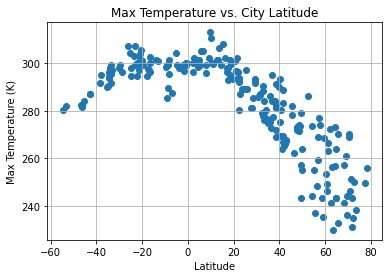

In [21]:
#Scatter plot of max temperature vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_maxtemp=weather_1_df['Max Temp']

plt.scatter(x_lat,y_maxtemp)
plt.title('Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.savefig('output_data/MaxTemp_Lat_Scatter.png')

print(f'The Max Temperature vs. City Latitude scatter plot visualy displays how the latitude of a city \nimpacts its Maximum Temerature. Based on this relationship, it is clear that the highest Maximum Temperatures \noccur in cities closest to the equator (0 Degreese Latitude).')

## Latitude vs. Humidity Plot

The Humidity vs. City Latitude scatter plot visualy displays how the latitude of a city 
impacts its Humidity level. There does not appear to be an obvious trend between the two variables.


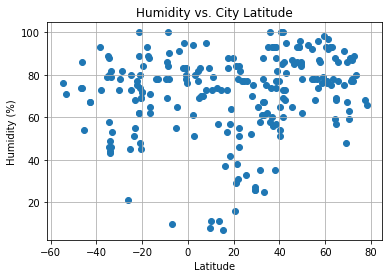

In [22]:
#Scatter plot of humidity vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_humidity=weather_1_df['Humidity']

plt.scatter(x_lat,y_humidity)
plt.title('Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.savefig('output_data/Humidity_Lat_Scatter.png')

print(f'The Humidity vs. City Latitude scatter plot visualy displays how the latitude of a city \nimpacts its Humidity level. There does not appear to be an obvious trend between the two variables.')

## Latitude vs. Cloudiness Plot

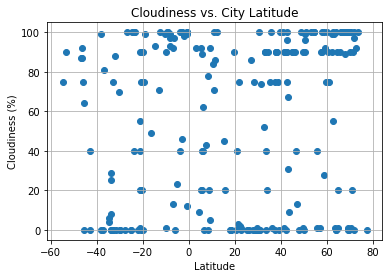

In [141]:
#Scatter plot of cloudiness vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_cloudiness=weather_1_df['Cloudiness']

plt.scatter(x_lat,y_cloudiness)
plt.title('Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.savefig('output_data/Cloudiness_Lat_Scatter.png')

print(f'The Cloudiness vs. City Latitude scatter plot visualy displays how the latitude of a city \nimpacts its CLoudiness level. There does not appear to be an obvious trend between the two variables.')

## Latitude vs. Wind Speed Plot

The Wind Speed vs. City Latitude scatter plot visualy displays how the latitude of a city 
impacts its Wind Speed. There does not appear to be an obvious trend between the two variables.


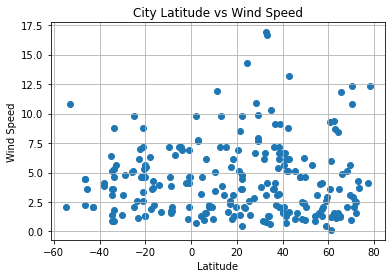

In [23]:
#Scatter plot of wind speed vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_windspeed=weather_1_df['Wind Speed']

plt.scatter(x_lat,y_windspeed)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.savefig('output_data/WindSpeed_Lat_Scatter.png')

print(f'The Wind Speed vs. City Latitude scatter plot visualy displays how the latitude of a city \nimpacts its Wind Speed. There does not appear to be an obvious trend between the two variables.')

## Linear Regression

In [24]:
#Northern Hemisphere Filter (Latitude>=0), assume that the equator is grouped into Norther Hemisphere
#weather_2_df includes only cities in the norther hemisphere
northern_filter=weather_1_df.loc[:,'Latitude']>=0
weather_2_df=weather_1_df.loc[northern_filter,:]
weather_2_df.head()
weather_2_df.describe()
# len(weather_2_df)

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02
mean,38.838724,-1.357190,276.965163,70.823529,53.705882,4.482026,1.611844e+09
std,20.452375,92.901342,20.425276,20.525055,38.525433,3.459134,8.874665e+01
min,2.016700,-173.300000,229.940000,7.000000,0.000000,0.130000,1.611843e+09
25%,22.239400,-80.151500,264.150000,61.000000,20.000000,1.660000,1.611844e+09
50%,38.500000,3.042000,279.270000,76.000000,65.000000,3.600000,1.611844e+09
75%,57.018600,77.240600,293.730000,86.000000,90.000000,6.170000,1.611844e+09
max,78.218600,179.316700,313.000000,100.000000,100.000000,16.900000,1.611844e+09


In [25]:
#Souther Hemisphere Filter (Latitude<0)
#weather_3_df includes only cities in the southern hemisphere
southern_filter=weather_1_df.loc[:,'Latitude']<0
weather_3_df=weather_1_df.loc[southern_filter,:]
weather_3_df.head()
weather_3_df.describe()
# len(weather_3_df)

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01
mean,-22.839826,34.913731,296.631892,71.391892,58.567568,4.171757,1.611844e+09
std,13.647193,100.233772,6.196237,17.076634,40.307408,2.224835,6.609773e+01
min,-54.800000,-175.200000,280.150000,10.000000,0.000000,0.890000,1.611843e+09
25%,-33.862775,-55.324225,294.722500,62.750000,16.500000,2.060000,1.611844e+09
50%,-21.273550,40.543850,298.150000,74.500000,75.000000,4.120000,1.611844e+09
75%,-13.370825,131.184725,300.150000,82.750000,100.000000,5.290000,1.611844e+09
max,-0.600000,173.166700,307.350000,100.000000,100.000000,10.800000,1.611844e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

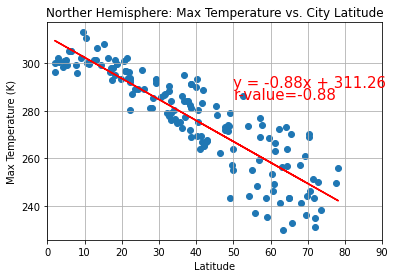

In [26]:
#Norther Hemisphere max temperature vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_maxtemp=weather_2_df['Max Temp']
                                   
plt.scatter(x_lat,y_maxtemp)
plt.title('Norther Hemisphere: Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,290),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,285),fontsize=15,color="red")

plt.savefig('output_data/Norther_MaxTemp_Lat_Reg.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

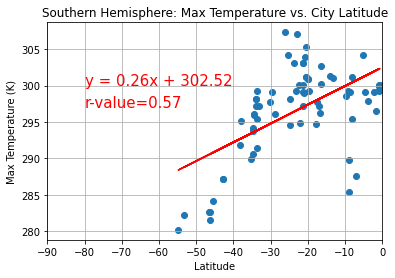

In [27]:
#SOuthern Hemisphere max temperature vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_maxtemp=weather_3_df['Max Temp']
                                            
plt.scatter(x_lat,y_maxtemp)
plt.title('Southern Hemisphere: Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,300),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,297),fontsize=15,color="red")

plt.savefig('output_data/Southern_MaxTemp_Lat_Reg.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

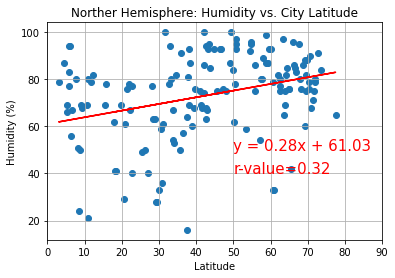

In [147]:
#Norther Hemisphere max temperature vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_humidity=weather_2_df['Humidity']
                                          
plt.scatter(x_lat,y_humidity)
plt.title('Norther Hemisphere: Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,40),fontsize=15,color="red")
plt.savefig('output_data/Northern_Humidity_Lat_Reg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

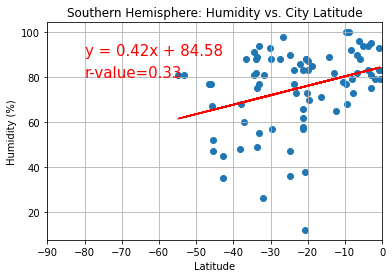

In [148]:
#Southern Hemisphere humidity vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_humidity=weather_3_df['Humidity']
                                          
plt.scatter(x_lat,y_humidity)
plt.title('Southern Hemisphere: Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,90),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,80),fontsize=15,color="red")
plt.savefig('output_data/Southern_Humidity_Lat_Reg.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

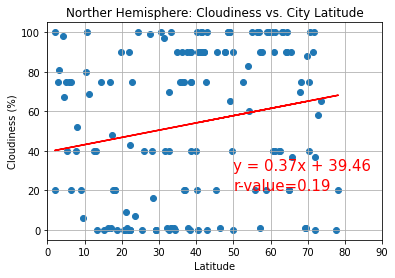

In [28]:
#Norther Hemisphere cloudiness vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_cloudiness=weather_2_df['Cloudiness']
                                          
plt.scatter(x_lat,y_cloudiness)
plt.title('Norther Hemisphere: Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,20),fontsize=15,color="red")
plt.savefig('output_data/Northern_Cloudiness_Lat_Reg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

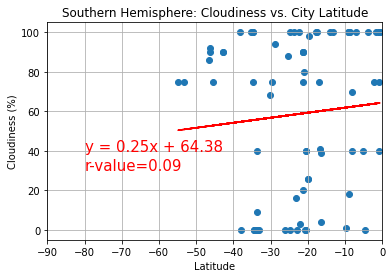

In [29]:
#Southern Hemisphere cloudiness vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_cloudiness=weather_3_df['Cloudiness']
                                          
plt.scatter(x_lat,y_cloudiness)
plt.title('Southern Hemisphere: Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,40),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,30),fontsize=15,color="red")
plt.savefig('output_data/Southern_Cloudiness_Lat_Reg.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

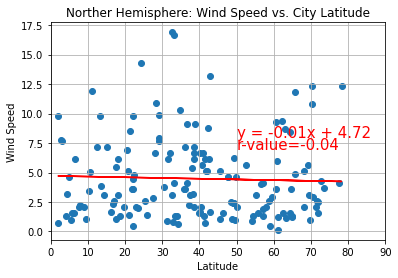

In [30]:
#Norther Hemisphere Wind Speed vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_windspeed=weather_2_df['Wind Speed']
                                          
plt.scatter(x_lat,y_windspeed)
plt.title('Norther Hemisphere: Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_windspeed)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,8),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,7),fontsize=15,color="red")
plt.savefig('output_data/Northern_WindSpeed_Lat_Reg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

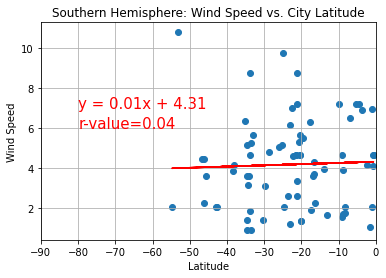

In [31]:
#Southern Hemisphere Wind Speed vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_windspeed=weather_3_df['Wind Speed']
                                          
plt.scatter(x_lat,y_windspeed)
plt.title('Southern Hemisphere: Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_windspeed)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,7),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,6),fontsize=15,color="red")
plt.savefig('output_data/Southern_WindSpeed_Lat_Reg.png')